
# Data Generation


In [ ]:
# Importation des Bibs
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Génération des données
def generate_data(n_samples=1000, n_features=10, n_informative=5, n_classes=3,
                  n_clusters_per_class=2, class_sep=1.0):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters_per_class,
        class_sep=class_sep,
        random_state=42
    )
    return X, y

# Visualisation des données en 2D avec PCA
def visualize_data(X, y, title):
    pca = PCA(n_components=2)  # Réduction à 2 dimensions
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.8)
    plt.title(title)
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.colorbar(scatter, label="Classe")
    plt.show()




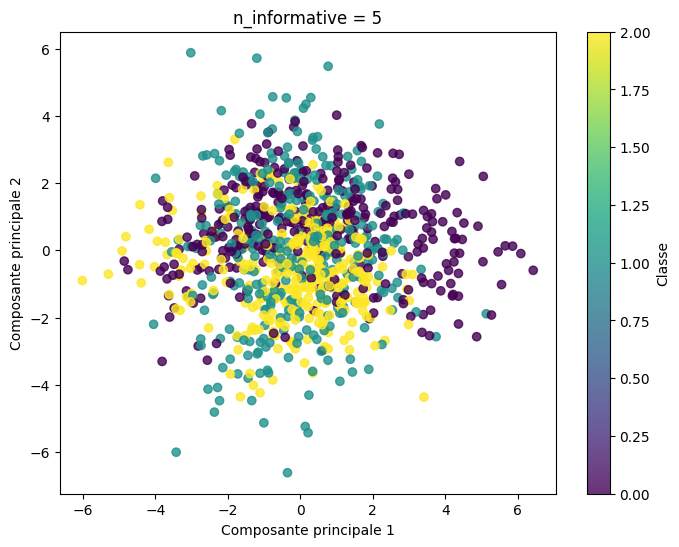

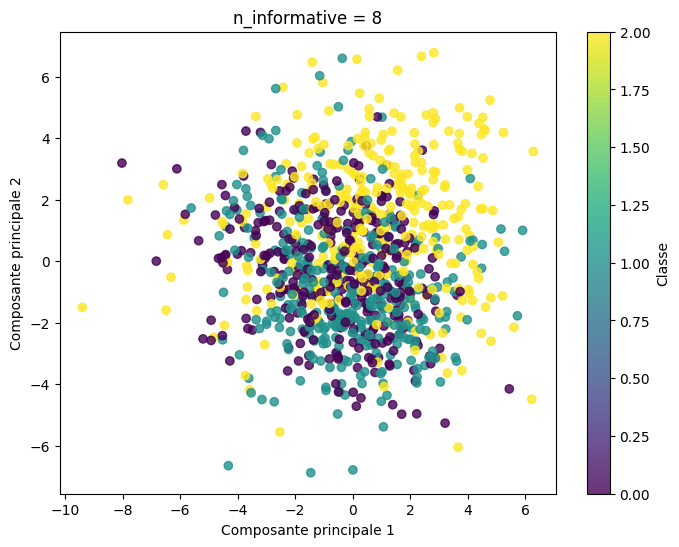

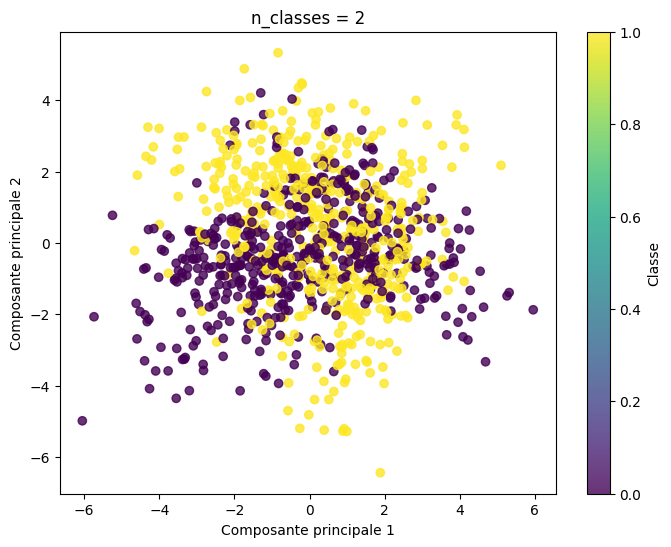

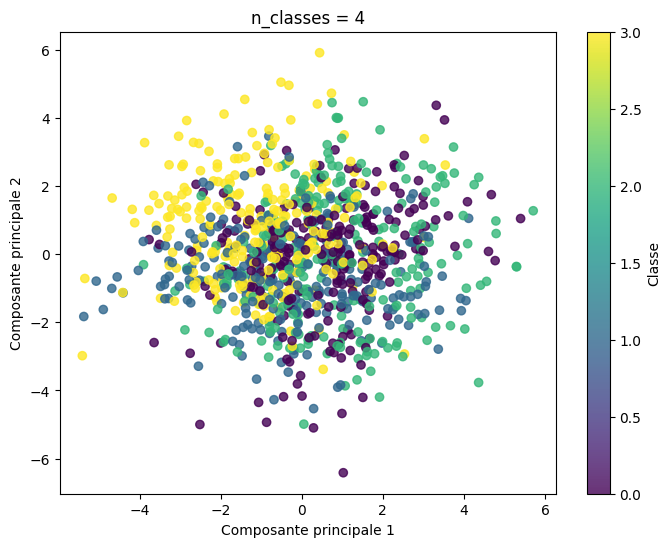

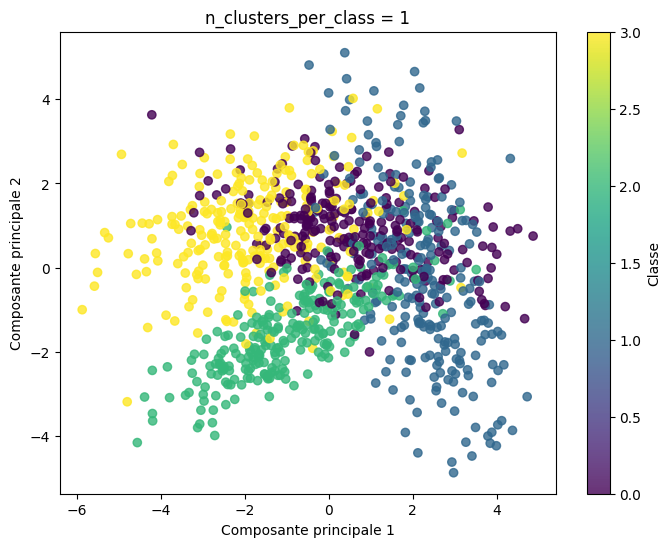

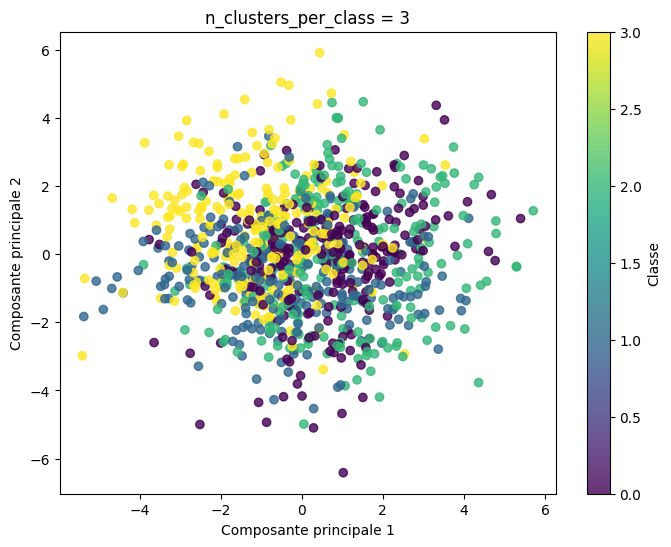

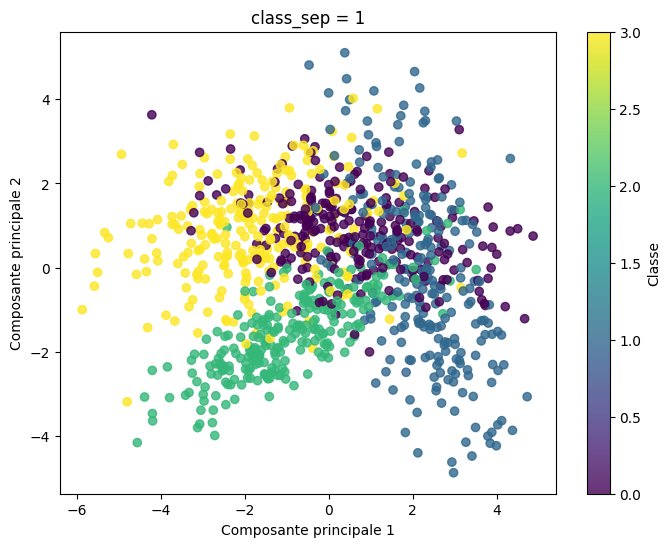

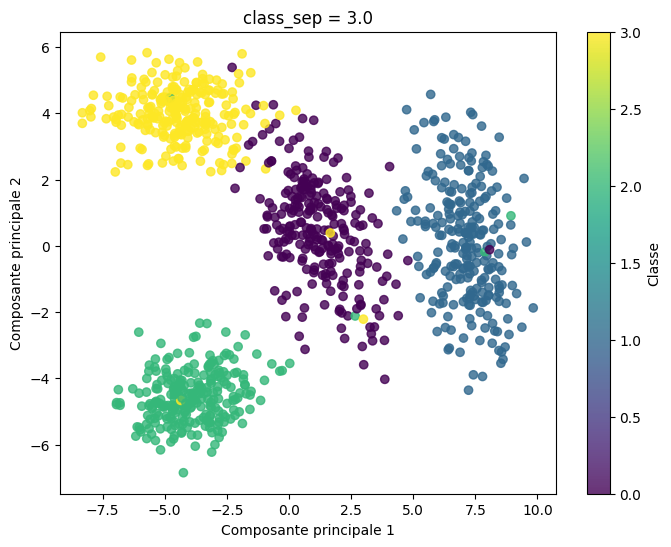

In [ ]:
# Tester différentes valeurs pour chaque paramètre

# 1. n_informative : 5 vs 8
for n_informative in [5, 8]:
    X, y = generate_data(n_features=10, n_informative=n_informative, n_classes=3,
                         n_clusters_per_class=3, class_sep=1.0)
    visualize_data(X, y, f"n_informative = {n_informative}")

# 2. n_classes : 2 vs 4
for n_classes in [2, 4]:
    X, y = generate_data(n_features=10, n_informative=5, n_classes=n_classes,
                         n_clusters_per_class=3, class_sep=1.0)
    visualize_data(X, y, f"n_classes = {n_classes}")

# 3. n_clusters_per_class : 1 vs 3
for n_clusters in [1, 3]:
    X, y = generate_data(n_features=10, n_informative=5, n_classes=4,
                         n_clusters_per_class=n_clusters, class_sep=1.0)
    visualize_data(X, y, f"n_clusters_per_class = {n_clusters}")

# 4. class_sep : 1 vs 3.0
for class_sep in [1, 3.0]:
    X, y = generate_data(n_features=10, n_informative=5, n_classes=4,
                         n_clusters_per_class=1, class_sep=class_sep)
    visualize_data(X, y, f"class_sep = {class_sep}")


# Interprétation et Conclusion des Résultats

## Paramètre : **n_informative** (5 vs 8)
- **\( n\_informative = 5 \)** : Ce choix permet de travailler avec un jeu de données modérément complexe, avec seulement 5 caractéristiques pertinentes influençant les classes. Cela facilite l’analyse et réduit le bruit des caractéristiques non informatives.  
- **\( n\_informative = 8 \)** : Augmenter le nombre de caractéristiques pertinentes à 8 permet de simuler des données plus riches et complexes. Cette augmentation teste si une plus grande quantité d’information améliore la séparation ou crée davantage de confusion.

### **Choix** :  
Avec \( n\_informative = 5 \), les clusters sont plus compacts et bien définis, tandis qu’avec \( n\_informative = 8 \), les classes sont potentiellement mieux séparées mais la complexité globale augmente, ce qui augmenterait le cout de calcul et la confusion.

---

## Paramètre : **n_classes** (2 vs 4)
- **\( n\_classes = 2 \)** : Deux classes simplifient le problème de classification, permettant de mieux comprendre les relations de base entre les caractéristiques et les labels.  
- **\( n\_classes = 4 \)** : Introduire 4 classes complexifie la structure, testant ainsi la capacité du modèle à gérer plusieurs catégories et à visualiser des clusters plus diversifiés, se rapporochant ainsi des problématiques réels.

### **Choix** :  
Avec \( n\_classes = 4 \), la diversité et la séparation des clusters augmentent, offrant une visualisation plus riche et plus complexe.

---

## Paramètre : **n_clusters_per_class** (1 vs 3)
- **\( n\_clusters\_per\_class = 1 \)** : Chaque classe est représentée par un cluster unique, ce qui favorise une séparation claire et une visualisation simple.  
- **\( n\_clusters\_per\_class = 3 \)** : Plusieurs clusters par classe (3) introduisent de la variabilité intra-classe, simulant une structure plus réaliste et difficile à séparer.

### **Choix** :  
Avec \( n\_clusters\_per\_class = 1 \), on observe une dispersion accrue des points, rendant les frontières entre classes plus simple.

---

## Paramètre : **class_sep** (1 vs 3)
- **\( class\_sep = 1 \)** : Une faible séparation crée des données plus mélangées, idéales pour tester la robustesse du modèle dans des cas difficiles.  
- **\( class\_sep = 3.0 \)** : Une grande séparation des classes garantit des distinctions nettes, facilitant l’analyse et la visualisation.

### **Choix** :  
Avec \( class\_sep = 3.0 \), les classes sont bien distinctes, tandis qu’avec \( class\_sep = 0.5 \), les frontières sont floues, augmentant la difficulté de classification.

---

## **Conclusion**
Le choix final des paramètres (\( n\_informative = 5 \), \( n\_classes = 4 \), \( n\_clusters\_per\_class = 1 \), \( class\_sep = 3 \)) représente un compromis entre complexité et interprétabilité. Ce choix final maximise l’interprétation tout en simulant des scénarios réalistes pour des données multiclasses.
